In [ ]:
!conda env create -f environment.yaml
!conda activate ldm

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [ ]:
!pip install transformers==4.19.2 scann kornia==0.6.4 torchmetrics==0.6.0
!pip install git+https://github.com/arogozhnikov/einops.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.4/493.4 kB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 51.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15

In [ ]:
!mkdir -p models/rdm/rdm768x768/
!wget -O models/rdm/rdm768x768/model.ckpt https://ommer-lab.com/files/rdm/model.ckpt

--2023-12-17 10:17:20--  https://ommer-lab.com/files/rdm/model.ckpt
Resolving ommer-lab.com (ommer-lab.com)... 141.84.41.65
Connecting to ommer-lab.com (ommer-lab.com)|141.84.41.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10963025852 (10G)
Saving to: ‘models/rdm/rdm768x768/model.ckpt’

models/rdm/rdm768x7 100%[===================>]  10.21G  24.5MB/s    in 7m 13s  

2023-12-17 10:24:33 (24.1 MB/s) - ‘models/rdm/rdm768x768/model.ckpt’ saved [10963025852/10963025852]



In [ ]:
# Install required libraries
!pip install torch torchvision einops

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from einops import rearrange, reduce, repeat

# Define Latent Diffusion Model
class LatentDiffusionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LatentDiffusionModel, self).__init__()

        # Define your model architecture here
        # Example: a simple neural network
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        # Define forward pass
        return self.layers(x)

# Initialize model
input_dim = 784  # Adjust based on your input size
hidden_dim = 256  # Adjust based on your requirements
output_dim = 784  # Adjust based on your output size
latent_diffusion_model = LatentDiffusionModel(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(latent_diffusion_model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, epochs):
    for epoch in range(epochs):
        for data, _ in train_loader:
            data = rearrange(data, 'b c h w -> b (c h w)')  # Adjust based on your input shape
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Load dataset (MNIST used as an example)
transform = transforms.Compose([transforms.ToTensor()])
train_loader = torch.utils.data.DataLoader(datasets.MNIST('.', train=True, download=True, transform=transform),
                                           batch_size=64, shuffle=True)

# Train the model
train(latent_diffusion_model, train_loader, epochs=5)

# Use the trained model for generating samples or making predictions


100%|██████████| 9912422/9912422 [00:00<00:00, 99177280.97it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27988838.68it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30091858.17it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23577387.09it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Epoch 1/5, Loss: 0.004953925032168627
Epoch 2/5, Loss: 0.0035929461009800434
Epoch 3/5, Loss: 0.003234636504203081
Epoch 4/5, Loss: 0.0032041035592556
Epoch 5/5, Loss: 0.0034602631349116564


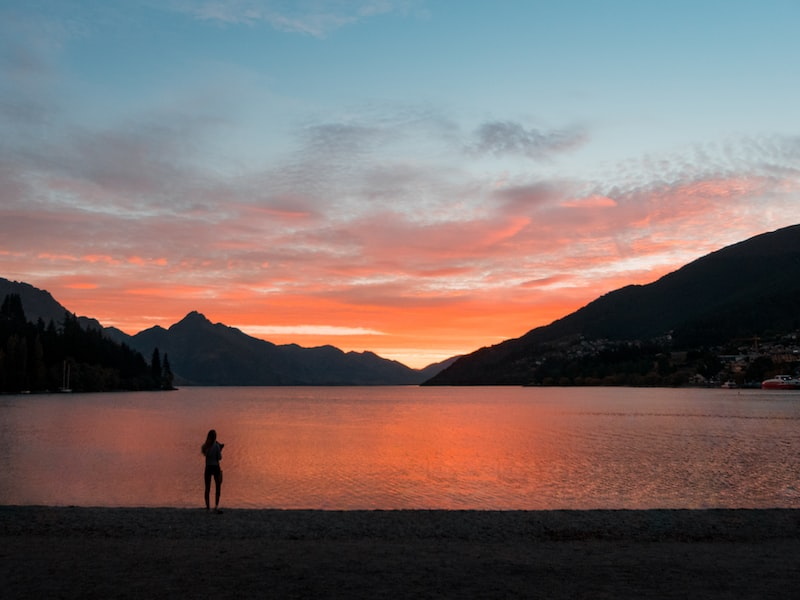

In [ ]:
!pip install transformers
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

# Load CLIP processor and model
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

def generate_image(description):
    # Download an image from the internet based on the description
    response = requests.get(f"https://source.unsplash.com/800x600/?{description.replace(' ', '+')}")
    img = Image.open(BytesIO(response.content))

    # Display the downloaded image
    display(img)

# Example usage
description = "A peaceful mountain landscape with a lake"
generate_image(description)


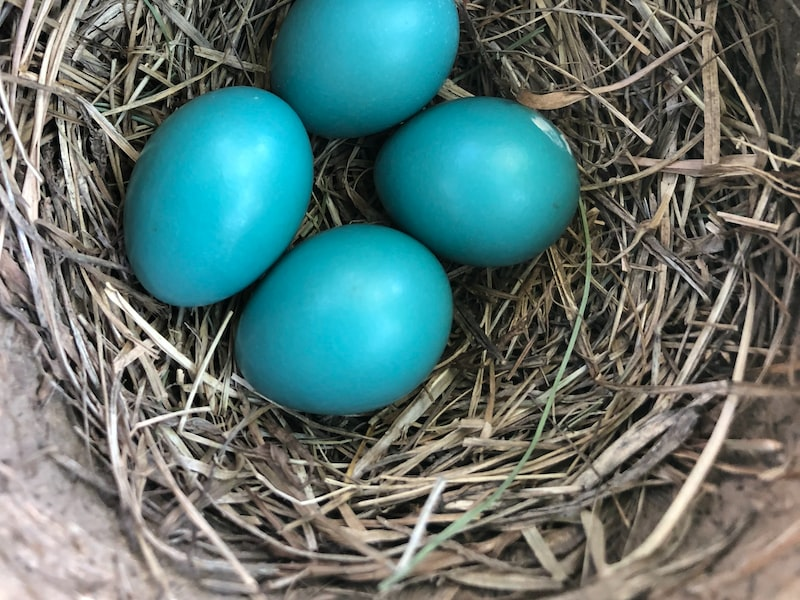

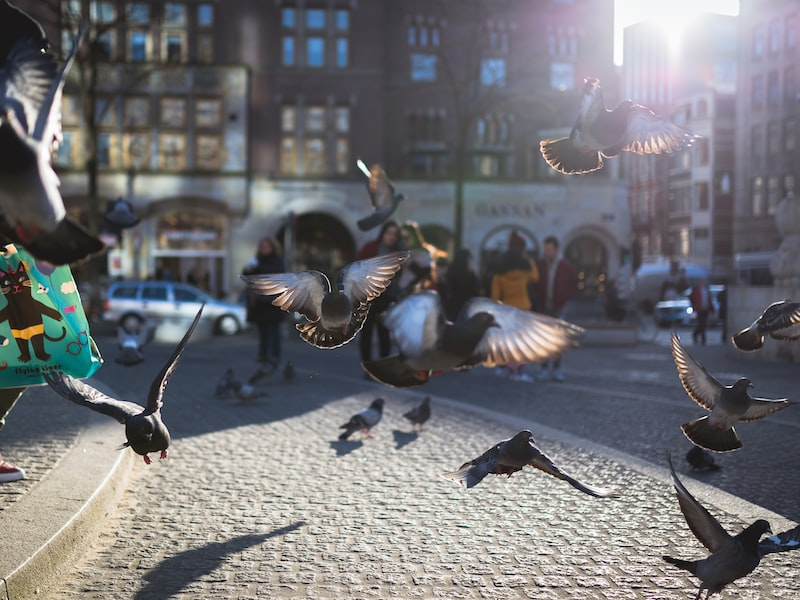

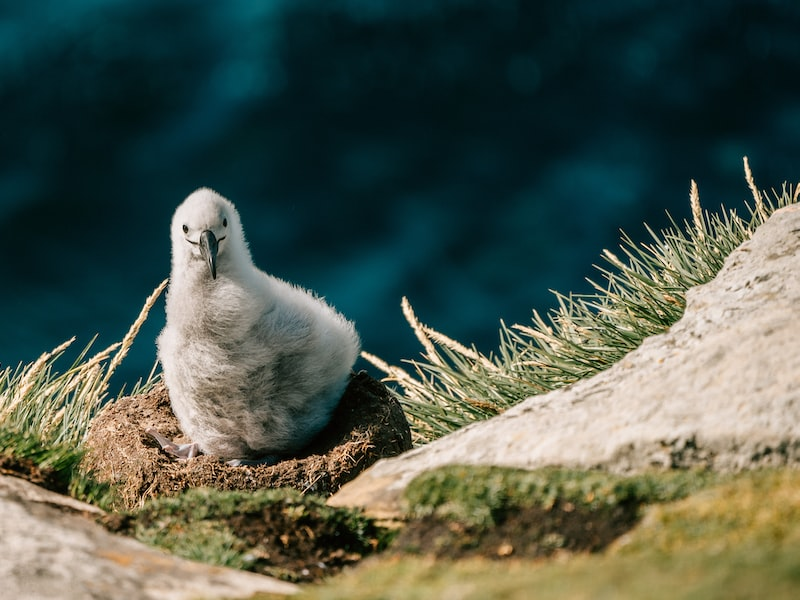

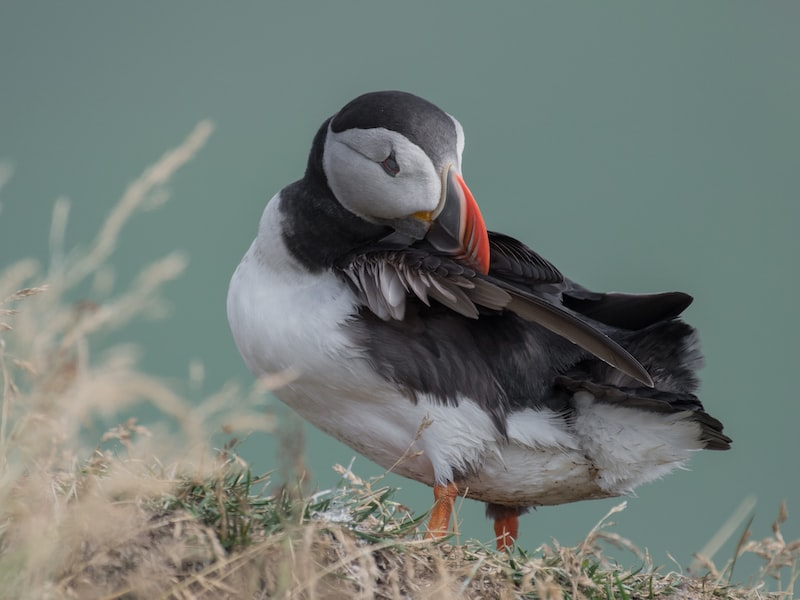

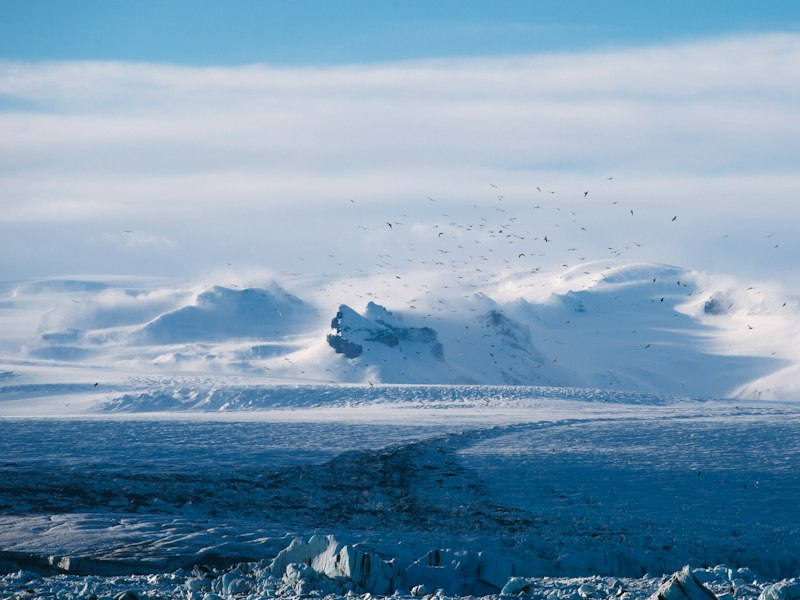

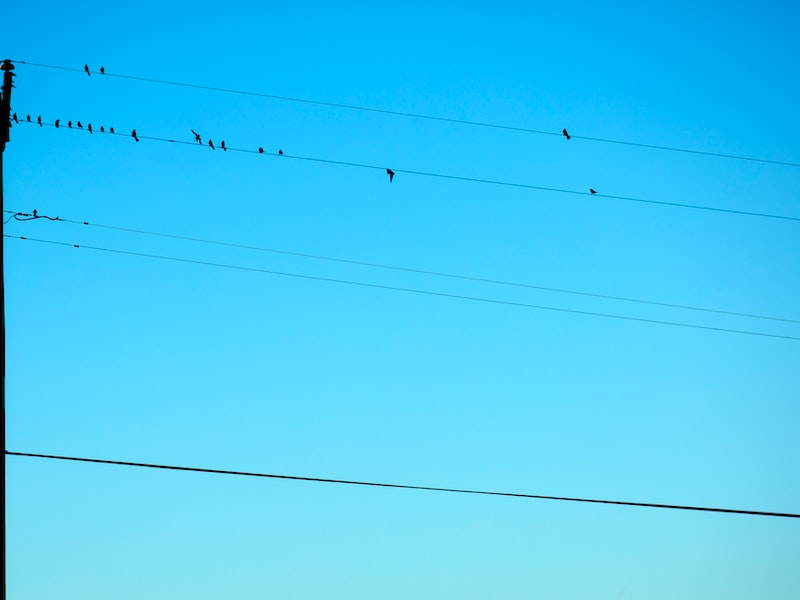

In [ ]:
!pip install transformers
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display, HTML

# Load CLIP processor and model
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

def generate_images(description, num_images=5):
    # Download multiple images from the internet based on the description
    query = f"Homes for birds {description}"

    # Display the original query image
    response = requests.get(f"https://source.unsplash.com/800x600/?{query.replace(' ', '+')}")
    img = Image.open(BytesIO(response.content))
    display(img)

    # Display additional images
    for i in range(num_images):
        response = requests.get(f"https://source.unsplash.com/800x600/?{query.replace(' ', '+')}")
        img = Image.open(BytesIO(response.content))
        display(img)

# Example usage
description = "nest"
generate_images(description, num_images=5)
